3# Assignment 3

 In this Assignment, we will use CNN to classify digits.   
The `MNIST` database is a large database of handwritten digits that is commonly used for training various image processing systems.


In [2]:
import tensorflow as tf

## Get the dataset

In [3]:
# Import the dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
# Split the dataset

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_test,y_test,test_size=0.2)

In [5]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [6]:
# Pre processing 
print(X_train.shape,Y_train.shape )


(8000, 28, 28) (8000,)


## Visualize the dataset
Print some images with labels.

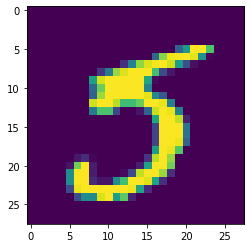

5


In [86]:
#displaying a random image

plt.imshow(X_train[90])
plt.show()
 
#print the corresponding label
print(Y_train[90])

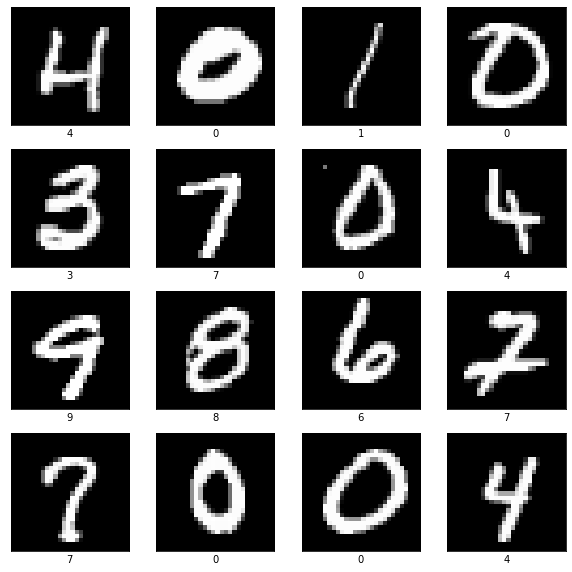

In [27]:
import matplotlib.pyplot as plt

# Your code
plt.figure(figsize=(10,10))
for i in range(16):
    # define subplot
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap='gray')
    plt.xlabel(Y_train[i])

  #plt.show()

Plot statistics of the training and testing dataset
(x axis: digits, y axis: number of samples corresponding to the digits)

In [8]:
import numpy as np
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [33]:
import numpy as np
unique, counts = np.unique(Y_train, return_counts=True)

print( np.array((unique, counts)).T)

[[  0 759]
 [  1 918]
 [  2 829]
 [  3 789]
 [  4 783]
 [  5 732]
 [  6 778]
 [  7 820]
 [  8 790]
 [  9 802]]


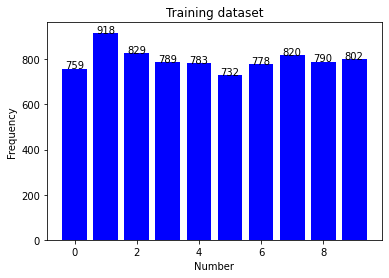

In [36]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha='center')
plt.bar(unique,counts, color='blue')
plt.title("Training dataset")
plt.xlabel("Number")
plt.ylabel("Frequency")
addlabels(unique, counts)
plt.show()

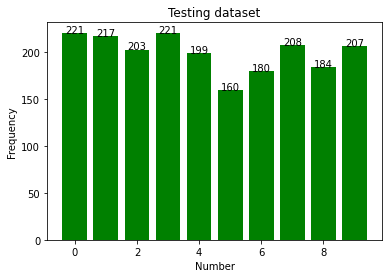

In [37]:
unique, counts = np.unique(Y_test, return_counts=True)
plt.bar(unique,counts, color='green')
plt.title("Testing dataset")
plt.xlabel("Number")
plt.ylabel("Frequency")
addlabels(unique, counts)
plt.show()


## Model

In [12]:
from tensorflow.keras import datasets, layers, models

In [53]:
# model building
# You are supposed to look at some CNN architectures and add convolutional layers along with MaxPooling, specifying the kernel size, pooling size, activation 
model = models.Sequential()
model.add(layers.Conv2D(32,(5,5),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(5,5),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

In [54]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
Total params: 52,096
Trainable params: 52,096
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [56]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1024)              0         
                                                                 
 dense_8 (Dense)             (None, 64)               

In [57]:
# Compile the model (add optimizers and metrics)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [58]:
# Fit the model on the training data (specify validation_split, read about validation if new to you)
history=model.fit(X_train,Y_train,epochs=15,
                 validation_split=0.2)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


200/200 [==============================] - 9s 41ms/step - loss: 1.8774 - accuracy: 0.7945 - val_loss: 0.2889 - val_accuracy: 0.9075
Epoch 2/15
200/200 [==============================] - 8s 40ms/step - loss: 0.1509 - accuracy: 0.9547 - val_loss: 0.1347 - val_accuracy: 0.9544
Epoch 3/15
200/200 [==============================] - 8s 40ms/step - loss: 0.0639 - accuracy: 0.9812 - val_loss: 0.1265 - val_accuracy: 0.9681
Epoch 4/15
200/200 [==============================] - 8s 39ms/step - loss: 0.0367 - accuracy: 0.9880 - val_loss: 0.1019 - val_accuracy: 0.9762
Epoch 5/15
200/200 [==============================] - 8s 40ms/step - loss: 0.0335 - accuracy: 0.9886 - val_loss: 0.1277 - val_accuracy: 0.9663
Epoch 6/15
200/200 [==============================] - 8s 40ms/step - loss: 0.0288 - accuracy: 0.9905 - val_loss: 0.1029 - val_accuracy: 0.9737
Epoch 7/15
200/200 [==============================] - 8s 40ms/step - loss: 0.0288 - accuracy: 0.9903 - val_loss: 0.1491 - val_accuracy: 0.9656
Epoch 8/15

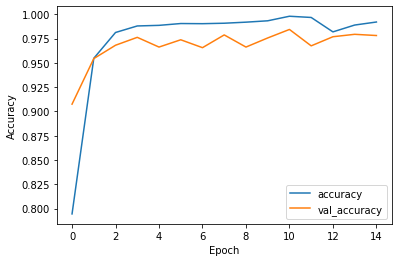

In [80]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [83]:
loss, accuracy = model.evaluate(X_test,Y_test, verbose=2)
print("Accuracy of the model: " ,accuracy*100 ,"%")

63/63 - 1s - loss: 0.0801 - accuracy: 0.9795 - 784ms/epoch - 12ms/step
Accuracy of the model:  97.94999957084656 %


In [62]:
prediction=model.predict(X_test[:36])

## Predict some images
Print the image along with its label (true value) and predicted value.

In [66]:
answer_arr=[]
for i in range(36):
  n=np.where(prediction[i]==max(prediction[i]))
  answer_arr.append(n)

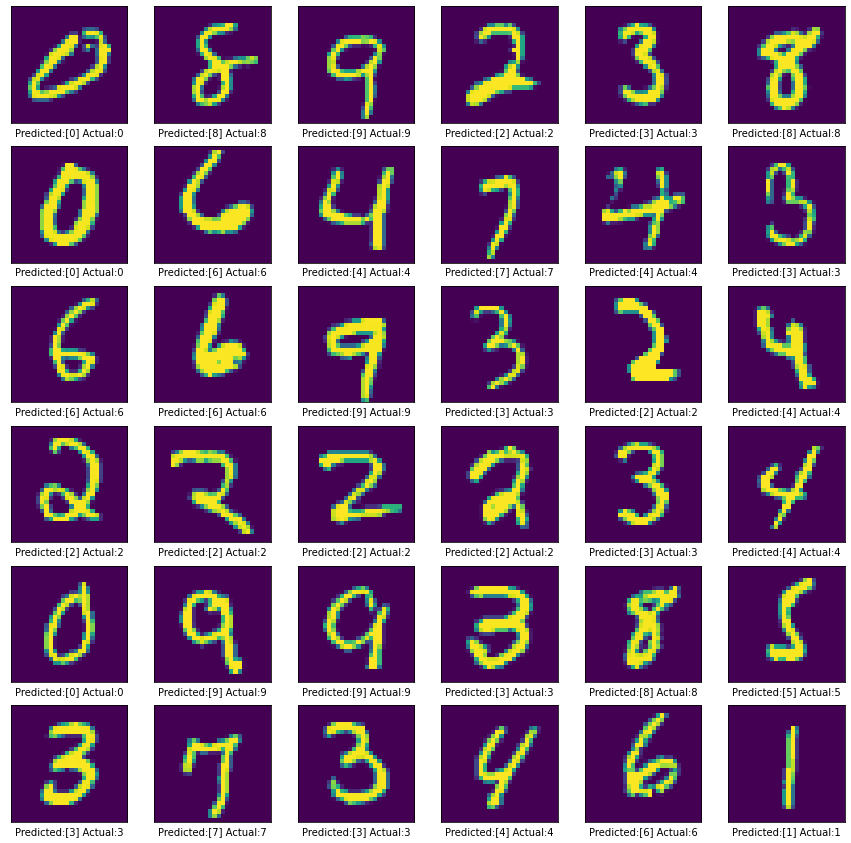

In [76]:
# Your code
plt.figure(figsize=(15,15))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    plt.xlabel("Predicted:" f"{answer_arr[i][0]}" " "  "Actual:" f"{Y_test[i]}")
    #plt.xlabel()